## Información de Productos,Tasas y valor final

In [1]:
import pyodbc #es para conectarse de forma odbc
import pandas as pd # para manejar tablas
import numpy as np

In [2]:
lz_cn = pyodbc.connect("DSN=DMIN", autocommit=True) 
Valor_final = pd.read_sql("""
  SELECT *
FROM Auditoriapdb.sucursales.valor_final
""", con=lz_cn) 


In [4]:
Valor_final

radicado  num_documento cod_segm_tasa  cod_subsegm_tasa  \
0     14427616428      996065497             2                -1   
1     14426549017      996040778             2                -1   
2     14427616428      996065497             2                -1   
3     14426547224     1081249122             2                -1   
4     14426549017      996040778             2                -1   
...           ...            ...           ...               ...   
1010  14427616299     1032032677             2                -1   
1011  14427616200      960192139             2                -1   
1012  14427616200      960192139             2                -1   
1013  14427616200      960192139             2                -1   
1014  14426537600      962411694             2                -1   

     cal_interna_tasa                                     id_producto  \
0                  R3          0000000000127047701 - 29-Cartera Total   
1                  R3          0000000000129007427 - 29-Cartera Total   
2                  R3  0000000000200021991 - 22-Leasing Cartera Total   
3                  R3                                   AUD - cartera   
4                  R3          0000000000200007119 - 29-Cartera Total   
...               ...                                             ...   
1010               R2                                   TDC - tarjeta   
1011               R2          0000000000970094727 - 29-Cartera Total   
1012               R2  0000000000200021991 - 22-Leasing Cartera Total   
1013               R2          0000000000970900022 - 29-Cartera Total   
1014               R2                                   AUD - cartera   

           tipo_id_producto  valor_inicial fecha_desembolso  plazo  ...  \
0     Obligacion - producto       199185.0       2021-04-13   60.0  ...   
1     Obligacion - producto       387000.0       2022-02-14   12.0  ...   
2     Obligacion - producto       137235.0       2018-05-30   72.0  ...   
3       cod_plan - producto        90000.0       2023-01-31   12.0  ...   
4     Obligacion - producto       450000.0       2022-03-09   12.0  ...   
...                     ...            ...              ...    ...  ...   
1010    cod_plan - producto       150000.0       2023-01-31   12.0  ...   
1011  Obligacion - producto       225417.0       2022-10-11    2.0  ...   
1012  Obligacion - producto       105955.5       2019-03-29   68.0  ...   
1013  Obligacion - producto      3657862.5       2022-11-30    1.0  ...   
1014    cod_plan - producto       150000.0       2023-01-31   12.0  ...   

      tasa_factoring tasa_tarjeta  tasa_efectiva_cartera  \
0            0.13810       0.3867              12.697830   
1            0.13810       0.3867              12.697830   
2            0.13810       0.3867              12.697830   
3            0.13810       0.3867              12.697830   
4            0.13810       0.3867              12.697830   
...              ...          ...                    ...   
1010         0.12986       0.3867              12.192084   
1011         0.12986       0.3867              12.192084   
1012         0.12986       0.3867              12.192084   
1013         0.12986       0.3867              12.192084   
1014         0.12986       0.3867              12.192084   

     tasa_efectiva_operacion tasa_efectiva_hipotecaria  tasa_efectiva_leasing  \
0                  13.131695                 20.663255               9.673506   
1                  13.131695                 20.663255               9.673506   
2                  13.131695                 20.663255               9.673506   
3                  13.131695                 20.663255               9.673506   
4                  13.131695                 20.663255               9.673506   
...                      ...                       ...                    ...   
1010               12.457393                  7.816964               9.141456   
1011               12.457393                 

In [7]:
import pyodbc

# Establecer la conexión a la base de datos
lz_cn = pyodbc.connect("DSN=DMIN", autocommit=True)

# Crear un objeto cursor para ejecutar comandos SQL
cursor = lz_cn.cursor()

# Pregunta al usuario por el número de documento del cliente que desea consultar
cedula_cliente = input("Ingrese el número de cédula del cliente que desea consultar: ")

# Crear una consulta SQL para obtener los datos necesarios del cliente especificado
sql_query = f"""
SELECT
    vf.num_documento,
    vf.id_producto,
    vf.tasa_efectiva_cartera,
    vf.tasa_efectiva_operacion,
    vf.tasa_efectiva_hipotecaria,
    vf.valor_final
FROM
    Auditoriapdb.sucursales.Valor_final vf
WHERE
    vf.num_documento = '{cedula_cliente}'
"""

# Ejecutar la consulta
cursor.execute(sql_query)

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Procesar y mostrar la información solicitada
if results:
    print(f"Información del cliente con cédula {cedula_cliente}:")
    for row in results:
        print(f"Producto: {row.id_producto}")
        print(f"Tasa Efectiva Cartera: {row.tasa_efectiva_cartera}%")
        print(f"Tasa Efectiva Operación: {row.tasa_efectiva_operacion}%")
        print(f"Tasa Efectiva Hipotecaria: {row.tasa_efectiva_hipotecaria}%")
        print(f"Valor Final: {row.valor_final}")
        print("-" * 30)
else:
    print(f"No se encontraron registros para el cliente con cédula {cedula_cliente}.")

# Cerrar el cursor y la conexión
cursor.close()
lz_cn.close()

Ingrese el número de cédula del cliente que desea consultar: 1081194523
Información del cliente con cédula 1081194523:
Producto: OPE - operacion_especifica
Tasa Efectiva Cartera: 24.089242029223%
Tasa Efectiva Operación: 21.070338883129658%
Tasa Efectiva Hipotecaria: 15.644518579320632%
Valor Final: 44283210.53871127
------------------------------
Producto: 0000000000000994972 - 29-Cartera Total
Tasa Efectiva Cartera: 24.089242029223%
Tasa Efectiva Operación: 21.070338883129658%
Tasa Efectiva Hipotecaria: 15.644518579320632%
Valor Final: 1445354.52175338
------------------------------
Producto: RCP - cartera
Tasa Efectiva Cartera: 23.621222693571653%
Tasa Efectiva Operación: 20.710833618856928%
Tasa Efectiva Hipotecaria: 15.444878833174425%
Valor Final: 708636.6808071496
------------------------------
Producto: 0000000000000099774 - 29-Cartera Total
Tasa Efectiva Cartera: 24.089242029223%
Tasa Efectiva Operación: 21.070338883129658%
Tasa Efectiva Hipotecaria: 15.644518579320632%
Valor 

In [9]:

# Establecer la conexión a la base de datos
lz_cn = pyodbc.connect("DSN=DMIN", autocommit=True)

# Crear un objeto cursor para ejecutar comandos SQL
cursor = lz_cn.cursor()
# Pregunta al usuario por el número de documento (cedula) del cliente que desea consultar
cedula_cliente = input("Ingrese el número de cédula del cliente que desea consultar: ")

# Crear una consulta SQL para obtener el valor total del cliente especificado
sql_query = f"""
SELECT
    vf.num_documento,
    SUM(vf.valor_final) AS valor_total
FROM
    Auditoriapdb.sucursales.Valor_final vf
WHERE
    vf.num_documento = '{cedula_cliente}'
GROUP BY
    vf.num_documento
"""

# Ejecutar la consulta
cursor.execute(sql_query)

# Obtener el resultado de la consulta
result = cursor.fetchone()

# Procesar y mostrar la información solicitada
if result:
    print(f"Valor total del cliente con cédula {result.num_documento}: {result.valor_total}")
else:
    print(f"No se encontraron registros para el cliente con cédula {cedula_cliente}.")

# Cerrar el cursor y la conexión
cursor.close()
lz_cn.close()

Ingrese el número de cédula del cliente que desea consultar: 1081194523
Valor total del cliente con cédula 1081194523: 83245168.76429959


## Tratamiento de datos python

In [15]:
obligaciones_df= pd.read_excel(r'C:/Users/juacifue/Downloads/Obligaciones_clientes.xlsx')
tasas_df= pd.read_excel(r'C:/Users/juacifue/Downloads/tasas_productos.xlsx')

In [16]:
# Limpieza y asignación de tipos de variables para Obligaciones

# Convertir la columna 'plazo' a tipo numérico que admita nulos y eliminar filas con valores None en 'plazo'
obligaciones_df['plazo'] = pd.to_numeric(obligaciones_df['plazo'], errors='coerce')
obligaciones_df = obligaciones_df.dropna(subset=['plazo'])

# Convertir las columnas de tasas en tipos numéricos que admitan nulos
tasas_columns = ['tasa_cartera', 'tasa_operacion_especifica', 'tasa_hipotecario', 'tasa_leasing',
                 'tasa_sufi', 'tasa_factoring', 'tasa_tarjeta']
for column in tasas_columns:
    tasas_df[column] = pd.to_numeric(tasas_df[column], errors='coerce')

# Proceso de cruzar los DataFrames usando un LEFT JOIN
merged_df = pd.merge(obligaciones_df, tasas_df, left_on=['cod_segm_tasa', 'cod_subsegm_tasa', 'cal_interna_tasa'],
                     right_on=['cod_segmento', 'cod_subsegmento', 'calificacion_riesgos'], how='left')

# Eliminar filas donde el plazo es None
merged_df = merged_df.dropna(subset=['plazo'])

# Mostrar el DataFrame resultante
print(merged_df)

         radicado  num_documento  cod_segm_tasa  cod_subsegm_tasa  \
0     14427616502     1081648945              5                 2   
1     14427616257     1032058622              2                -1   
2     14427615471     1081374249              5                 2   
3     14426546522      996136114              5                 1   
4     14427616197     1080662762              5                 2   
...           ...            ...            ...               ...   
2037  14427616294      109325188              9                -1   
2038  14427615890      960246199              5                 4   
2039  14427615829     1080515925              5                 3   
2040  14427616509     1080240535              5                 2   
2041  14427615776     1080188275              5                 3   

     cal_interna_tasa                             id_producto  \
0                  C4              OEL - operacion_especifica   
1                  R1  000000000009749217

In [21]:
# Calcular el valor final como la multiplicación del valor inicial por la tasa efectiva
merged_df['valor_final'] = merged_df['valor_inicial'] * ((1 + merged_df['tasa_cartera']) ** (1 / (12 / merged_df['cod_periodicidad'])) - 1) * (12 / merged_df['cod_periodicidad'])

# Calcular el monto total de la deuda por segmento de cliente
monto_total_deuda_por_segmento = merged_df.groupby('cod_segm_tasa')['valor_final'].sum().reset_index()

# Mostrar el DataFrame resultante con el monto total de la deuda por segmento
print(monto_total_deuda_por_segmento)

   cod_segm_tasa   valor_final
0              2  2.999253e+07
1              5  9.007296e+07
2              9  9.541000e+05


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Seleccionar las columnas relevantes para el análisis
data_for_clustering = merged_df[['valor_final', 'tasa_cartera', 'tasa_operacion_especifica', 'tasa_hipotecario',
                                 'tasa_leasing', 'tasa_sufi', 'tasa_factoring', 'tasa_tarjeta']]

# Normalizar los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_for_clustering)

# Aplicar el algoritmo k-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_normalized)

# Agregar la columna 'cluster' al DataFrame merged_df
merged_df['cluster'] = clusters

# Mostrar el DataFrame resultante con la asignación de clusters
print(merged_df[['num_documento', 'valor_final', 'tasa_cartera', 'cluster']])

      num_documento    valor_final  tasa_cartera  cluster
0        1081648945  184173.704609      0.190215        2
1        1032058622   32910.963251      0.121857        0
2        1081374249   13205.882653      0.190215        2
3         996136114  111441.099294      0.193960        2
4        1080662762   33490.672657      0.190215        2
...             ...            ...           ...      ...
2037      109325188   17634.683206      0.278318        1
2038      960246199  132444.454162      0.279129        2
2039     1080515925   13646.629915      0.228056        2
2040     1080240535   11532.673784      0.210082        2
2041     1080188275    8749.772092      0.167614        0

[2042 rows x 4 columns]


In [23]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas relevantes para el análisis
data_for_clustering = merged_df[['valor_final', 'tasa_cartera', 'tasa_operacion_especifica', 'tasa_hipotecario',
                                 'tasa_leasing', 'tasa_sufi', 'tasa_factoring', 'tasa_tarjeta']]

# Normalizar los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_for_clustering)

# Aplicar el algoritmo SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
clusters = spectral_clustering.fit_predict(data_normalized)

# Agregar la columna 'cluster' al DataFrame merged_df
merged_df['cluster'] = clusters

# Mostrar el DataFrame resultante con la asignación de clusters
print(merged_df[['num_documento', 'valor_final', 'tasa_cartera', 'cluster']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


      num_documento    valor_final  tasa_cartera  cluster
0        1081648945  184173.704609      0.190215        0
1        1032058622   32910.963251      0.121857        0
2        1081374249   13205.882653      0.190215        0
3         996136114  111441.099294      0.193960        0
4        1080662762   33490.672657      0.190215        0
...             ...            ...           ...      ...
2037      109325188   17634.683206      0.278318        2
2038      960246199  132444.454162      0.279129        0
2039     1080515925   13646.629915      0.228056        0
2040     1080240535   11532.673784      0.210082        0
2041     1080188275    8749.772092      0.167614        0

[2042 rows x 4 columns]


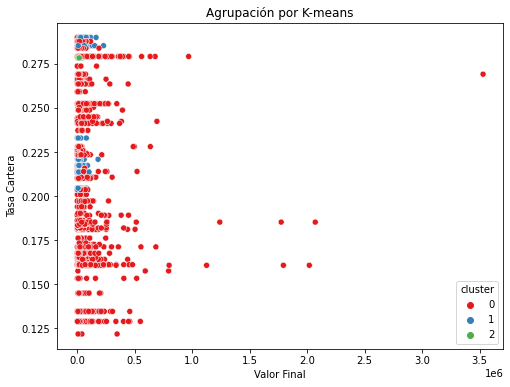

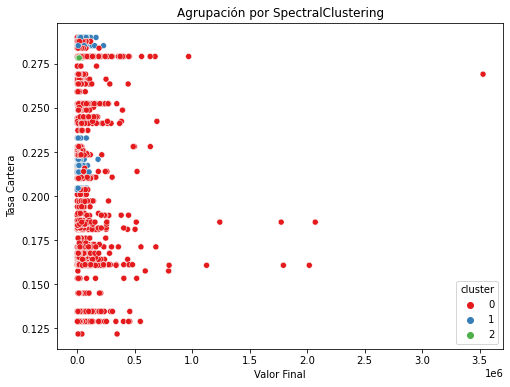

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico para K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(x='valor_final', y='tasa_cartera', hue='cluster', data=merged_df, palette='Set1')
plt.title('Agrupación por K-means')
plt.xlabel('Valor Final')
plt.ylabel('Tasa Cartera')
plt.show()

# Gráfico para SpectralClustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='valor_final', y='tasa_cartera', hue='cluster', data=merged_df, palette='Set1')
plt.title('Agrupación por SpectralClustering')
plt.xlabel('Valor Final')
plt.ylabel('Tasa Cartera')
plt.show()

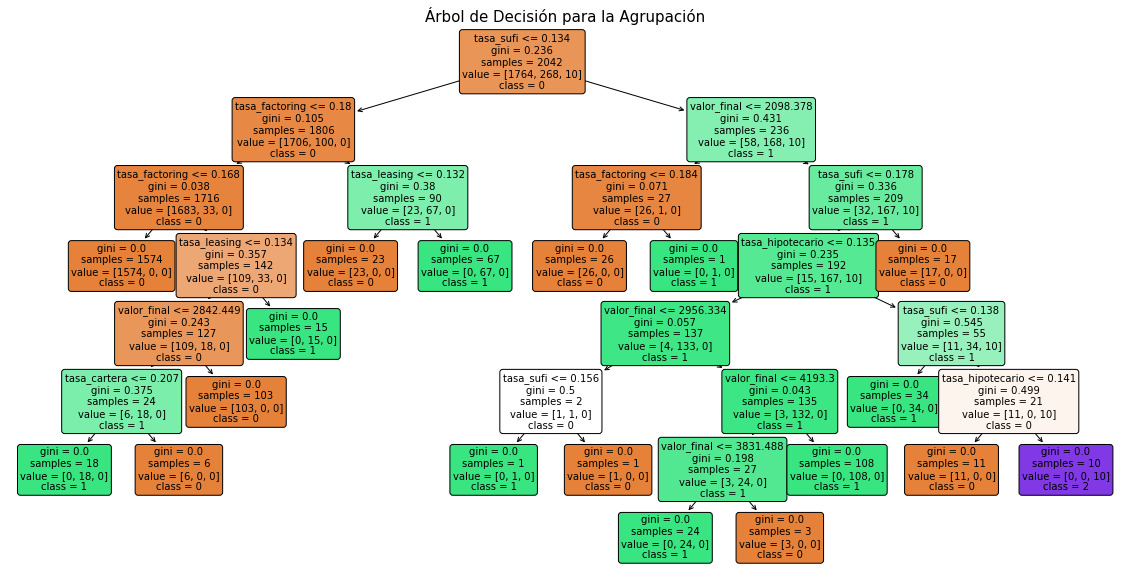

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes para el análisis
data_for_tree = merged_df[['valor_final', 'tasa_cartera', 'tasa_operacion_especifica', 'tasa_hipotecario',
                           'tasa_leasing', 'tasa_sufi', 'tasa_factoring', 'tasa_tarjeta', 'cluster']]

# Separar las características (X) de la variable objetivo (y)
X = data_for_tree.drop('cluster', axis=1)
y = data_for_tree['cluster']

# Crear y entrenar el modelo de árbol de decisión
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X, y)

# Crear la gráfica de árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=[str(i) for i in decision_tree.classes_],
          filled=True, rounded=True, fontsize=10)
plt.title('Árbol de Decisión para la Agrupación', fontsize=15)
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las columnas relevantes para la regresión
data_for_regression = merged_df[['valor_final', 'tasa_cartera', 'tasa_operacion_especifica', 'tasa_hipotecario',
                                 'tasa_leasing', 'tasa_sufi', 'tasa_factoring', 'tasa_tarjeta']]

# Separar las características (X) del saldo de la deuda (y)
X = data_for_regression.drop('valor_final', axis=1)
y = data_for_regression['valor_final']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 64093616867.889824
R-squared (R2): 0.010382676314256378


In [27]:
# Importar la clase de Regresión de Árbol de Decisión
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo de regresión de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo con los datos
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Calcular el MSE y R2
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Regresión de Árbol de Decisión:")
print("Mean Squared Error (MSE):", mse_tree)
print("R-squared (R2):", r2_tree)

Regresión de Árbol de Decisión:
Mean Squared Error (MSE): 63122062741.05078
R-squared (R2): 0.025383652102533016


In [28]:
# Importar la clase de Regresión de Bosque Aleatorio
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de regresión de bosque aleatorio
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos
forest_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_forest = forest_model.predict(X_test)

# Calcular el MSE y R2
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Regresión de Bosque Aleatorio:")
print("Mean Squared Error (MSE):", mse_forest)
print("R-squared (R2):", r2_forest)

Regresión de Bosque Aleatorio:
Mean Squared Error (MSE): 62956667617.4125
R-squared (R2): 0.02793738346618757


In [31]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Obtener las características X y el target y
X = merged_df[['tasa_cartera', 'tasa_operacion_especifica', 'tasa_hipotecario',
               'tasa_leasing', 'tasa_sufi', 'tasa_factoring', 'tasa_tarjeta']]
y = merged_df['valor_final']

# Modelos
linear_model_multiple = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)

# Validación cruzada con 5 folds para cada modelo
linear_scores = cross_val_score(linear_model_multiple, X, y, cv=5, scoring='neg_mean_squared_error')
tree_scores = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_squared_error')
forest_scores = cross_val_score(forest_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calcular el MSE promedio para cada modelo
linear_mse_scores = -linear_scores
tree_mse_scores = -tree_scores
forest_mse_scores = -forest_scores

# Calcular el R-squared promedio para cada modelo
linear_r2_scores = cross_val_score(linear_model_multiple, X, y, cv=5, scoring='r2')
tree_r2_scores = cross_val_score(tree_model, X, y, cv=5, scoring='r2')
forest_r2_scores = cross_val_score(forest_model, X, y, cv=5, scoring='r2')

# Imprimir los resultados
print("Regresión Lineal Múltiple - Mean Squared Error (MSE):", linear_mse_scores.mean())
print("Regresión Lineal Múltiple - R-squared (R2):", linear_r2_scores.mean())

print("Árbol de Decisión - Mean Squared Error (MSE):", tree_mse_scores.mean())
print("Árbol de Decisión - R-squared (R2):", tree_r2_scores.mean())

print("Bosque Aleatorio - Mean Squared Error (MSE):", forest_mse_scores.mean())
print("Bosque Aleatorio - R-squared (R2):", forest_r2_scores.mean())

Regresión Lineal Múltiple - Mean Squared Error (MSE): 21595236693.15595
Regresión Lineal Múltiple - R-squared (R2): 0.02359032269625403
Árbol de Decisión - Mean Squared Error (MSE): 21524425815.610332
Árbol de Decisión - R-squared (R2): -0.000696295679558645
Bosque Aleatorio - Mean Squared Error (MSE): 21576418805.514755
Bosque Aleatorio - R-squared (R2): -0.00776186146960649


### interpretación

Regresión Lineal Múltiple:

Mean Squared Error (MSE): 21595236693.15595
R-squared (R2): 0.02359032269625403
Interpretación:
El modelo de Regresión Lineal Múltiple tiene un MSE de aproximadamente 21595236693.16, lo que indica que el error cuadrático medio promedio entre las predicciones del modelo y los valores reales de la deuda del cliente es de aproximadamente 21595236693.16 unidades monetarias al cuadrado. Un valor menor de MSE indica un mejor ajuste del modelo.

El valor del R-squared (R2) es de aproximadamente 0.0236, lo que significa que aproximadamente el 2.36% de la variabilidad en la deuda del cliente puede ser explicada por las características utilizadas en el modelo. Un valor de R2 cercano a 1 indica un buen ajuste del modelo, pero en este caso, el valor es bastante bajo, lo que sugiere que el modelo no está capturando bien la variabilidad en los datos.

Árbol de Decisión:

Mean Squared Error (MSE): 21524425815.610332
R-squared (R2): -0.000696295679558645
Interpretación:
El modelo de Árbol de Decisión tiene un MSE de aproximadamente 21524425815.61, lo que indica que el error cuadrático medio promedio entre las predicciones del modelo y los valores reales de la deuda del cliente es de aproximadamente 21524425815.61 unidades monetarias al cuadrado. Nuevamente, un valor menor de MSE es preferible.

Sin embargo, el valor del R-squared (R2) es de aproximadamente -0.0007, lo que implica que el modelo no está explicando prácticamente nada de la variabilidad en los datos. Esto sugiere que el modelo de Árbol de Decisión no es adecuado para este conjunto de datos y no está logrando un buen ajuste.

Bosque Aleatorio:

Mean Squared Error (MSE): 21576418805.514755
R-squared (R2): -0.00776186146960649
Interpretación:
El modelo de Bosque Aleatorio tiene un MSE de aproximadamente 21576418805.51, que se encuentra en línea con los otros modelos. Nuevamente, un valor menor de MSE es preferible.

El valor del R-squared (R2) es de aproximadamente -0.0078, que es similar al modelo de Árbol de Decisión y sugiere que el Bosque Aleatorio tampoco está logrando un buen ajuste a los datos.

Dado lo anterior es necesario considerar aumentar las variables explicativas para determinar de mejor manera la deuda del cliente en las que se puede pensar usar el segmento, su claificación de riesgo y variables macroeconomicas como una TRM

## Ejecución programa 

In [33]:
def calcular_promedio_mayor_al_promedio(secuencia):
    # Calcular el promedio de la secuencia
    promedio_secuencia = sum(secuencia) / len(secuencia)

    # Calcular el promedio de los valores mayores al promedio de la secuencia
    valores_mayores_al_promedio = [num for num in secuencia if num > promedio_secuencia]
    if len(valores_mayores_al_promedio) > 0:
        promedio_mayor_al_promedio = sum(valores_mayores_al_promedio) / len(valores_mayores_al_promedio)
    else:
        promedio_mayor_al_promedio = 0  # En caso de que no haya valores mayores al promedio

    return promedio_mayor_al_promedio

def main():
    secuencia = []
    print("Ingresa una secuencia de números. Finaliza ingresando -1.")
    while True:
        num = int(input("Ingresa un número: "))
        if num == -1:
            break
        secuencia.append(num)

    promedio_mayor = calcular_promedio_mayor_al_promedio(secuencia)
    print(f"El promedio de los valores mayores al promedio de la secuencia es: {promedio_mayor}")

if __name__ == "__main__":
    main()

Ingresa una secuencia de números. Finaliza ingresando -1.
Ingresa un número: 6
Ingresa un número: 2
Ingresa un número: 3
Ingresa un número: -1
El promedio de los valores mayores al promedio de la secuencia es: 6.0


In [35]:
def encontrar_par_suma_mas_cercana(lista, x):
    # Inicializar los punteros izquierdo y derecho
    izquierda = 0
    derecha = len(lista) - 1

    # Inicializar variables para guardar la suma más cercana y el par de números resultante
    suma_mas_cercana = float('inf')
    par_mas_cercano = None

    # Recorrer la lista mientras los punteros no se crucen
    while izquierda < derecha:
        suma_actual = lista[izquierda] + lista[derecha]
        diferencia = abs(suma_actual - x)

        # Actualizar la suma más cercana y el par resultante si encontramos una mejor opción
        if diferencia < suma_mas_cercana:
            suma_mas_cercana = diferencia
            par_mas_cercano = (lista[izquierda], lista[derecha])

        # Mover los punteros según la suma actual
        if suma_actual < x:
            izquierda += 1
        else:
            derecha -= 1

    # Imprimir el par más cercano a x
    print(f"El par más cercano a {x} es ({par_mas_cercano[0]}, {par_mas_cercano[1]})")

# Ejemplo de uso:
lista_ordenada = [1, 3, 5, 7, 9, 11, 13]
x = 10
encontrar_par_suma_mas_cercana(lista_ordenada, x)

El par más cercano a 10 es (1, 9)


In [36]:
def rotar_matriz(matriz, p):
    m = len(matriz)
    n = len(matriz[0])

    # Si p es negativo, rotar en sentido antihorario
    if p < 0:
        p = abs(p) % n
        nueva_matriz = [fila[-p:] + fila[:-p] for fila in matriz]
    # Si p es positivo, rotar en sentido horario
    else:
        p = p % n
        nueva_matriz = [fila[p:] + fila[:p] for fila in matriz]

    # Imprimir la matriz resultante
    for fila in nueva_matriz:
        print(fila)

# Ejemplo de uso:
matriz_ejemplo = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
p = -1
rotar_matriz(matriz_ejemplo, p)

[3, 1, 2]
[6, 4, 5]
[9, 7, 8]
